In [19]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math


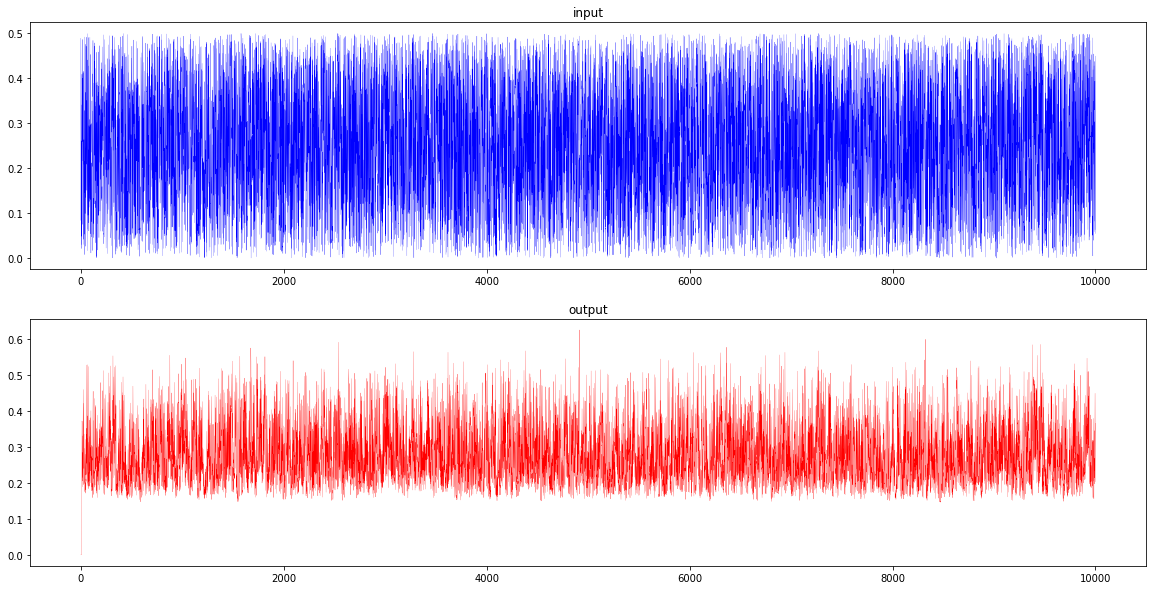

In [21]:
x, y = np.loadtxt("data.txt", delimiter=",")
t=np.arange(start=0,stop=len(x), step=1)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.title('input')
plt.plot(t,x, color = 'b', linewidth= 0.2)
plt.subplot(2,1,2)
plt.title('output')
plt.plot(t,y, color = 'r', linewidth = 0.2)

x_train = x[:4000]
x_valid = x[4000:5000]
x_test = x[5000:]

y_train = x[:4000]
y_valid = x[4000:5000]
y_test = x[5000:]

## RNN

In [22]:
def create_model(hidden_units,dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0], return_sequences=True)) #stateful = True
    model.add(Dense(units=dense_units, activation=activation[1]))
    learning_rate = 0.01
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [23]:
model = create_model(20, 1 , (len(x_train),1), activation=['tanh', 'tanh'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 4000, 20)          440       
                                                                 
 dense_1 (Dense)             (None, 4000, 1)           21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [24]:
wx = model.get_weights()[0]
wh = model.get_weights()[1]
bh = model.get_weights()[2]
wy = model.get_weights()[3]
by = model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)




wx =  [[-0.33200592  0.27037817  0.39760864 -0.30316228 -0.01816863  0.35255283
  -0.03220731 -0.29655588  0.26433855  0.04294169  0.12681729  0.08596253
   0.5029525  -0.27787316 -0.40154308 -0.16358975  0.39491785  0.27214128
   0.08965218 -0.2269429 ]]  wh =  [[-0.19784963 -0.18062483  0.53992045 -0.32370058 -0.32539666  0.20573722
  -0.03608559  0.0855672   0.23982845 -0.13056947  0.14527111  0.03142562
  -0.02874376  0.14834356  0.33993962  0.1985721   0.19552079 -0.19537689
  -0.00311445 -0.15559585]
 [-0.40060237  0.10093316  0.26491365  0.44802085  0.00084748 -0.2631131
   0.2670095   0.05824821  0.27817556 -0.17049336  0.09193505  0.20515254
  -0.3775966  -0.12484461 -0.19778362 -0.02346751  0.03931006  0.21000531
   0.11489862 -0.02897191]
 [-0.21867429  0.05606049  0.21379086  0.06340948  0.4875524   0.33355924
  -0.23581192  0.23615707  0.08860846  0.1124488  -0.05764235  0.04076481
   0.14377326 -0.04928637 -0.3176883   0.10126553 -0.04469785 -0.05073341
  -0.4861936  -0.1

In [25]:
print(x_train.shape)

(4000,)


In [26]:

X_train = np.reshape(x_train, (1,len(x_train),1))
Y_train = np.reshape(y_train, (1,len(y_train),1))

X_valid = np.reshape(x_valid, (1,len(x_valid),1))
Y_valid = np.reshape(y_valid, (1,len(y_valid),1))

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)


model.evaluate(X_train, Y_train)
#history = model.fit(X_train, Y_train, epochs = 100, validation_data = (X_valid, Y_valid))
history = model.fit(X_train, Y_train,validation_data = (X_valid, Y_valid), epochs = 300).history




(1, 4000, 1)
(1, 4000, 1)
(1, 1000, 1)
(1, 1000, 1)
1/1 [==============================] - 0s 279ms/step - loss: 0.4097
Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.4097 - val_loss: 0.3313
Epoch 2/300
1/1 [==============================] - 0s 450ms/step - loss: 0.3350 - val_loss: 0.2623
Epoch 3/300
1/1 [==============================] - 0s 435ms/step - loss: 0.2652 - val_loss: 0.2004
Epoch 4/300
1/1 [==============================] - 0s 419ms/step - loss: 0.2026 - val_loss: 0.1470
Epoch 5/300
1/1 [==============================] - 0s 412ms/step - loss: 0.1485 - val_loss: 0.1031
Epoch 6/300
1/1 [==============================] - 0s 418ms/step - loss: 0.1040 - val_loss: 0.0691
Epoch 7/300
1/1 [==============================] - 0s 438ms/step - loss: 0.0694 - val_loss: 0.0446
Epoch 8/300
1/1 [==============================] - 0s 425ms/step - loss: 0.0445 - val_loss: 0.0291
Epoch 9/300
1/1 [==============================] - 0s 447ms/step - loss: 0.0285 - val_loss:

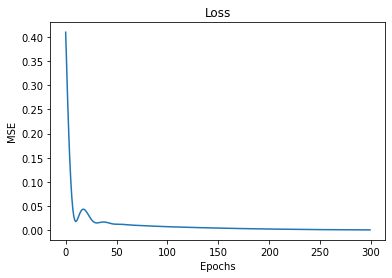

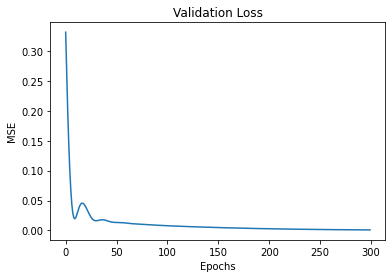

In [27]:
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

plt.plot(history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

1/1 [==============================] - 0s 73ms/step - loss: 9.4453e-04


0.0009445305913686752

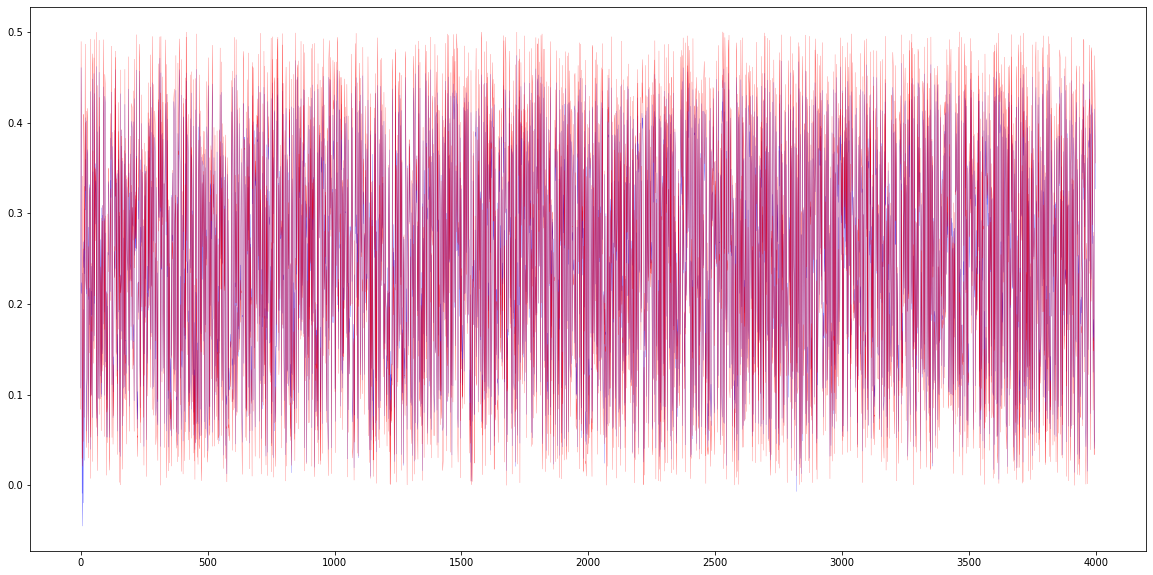

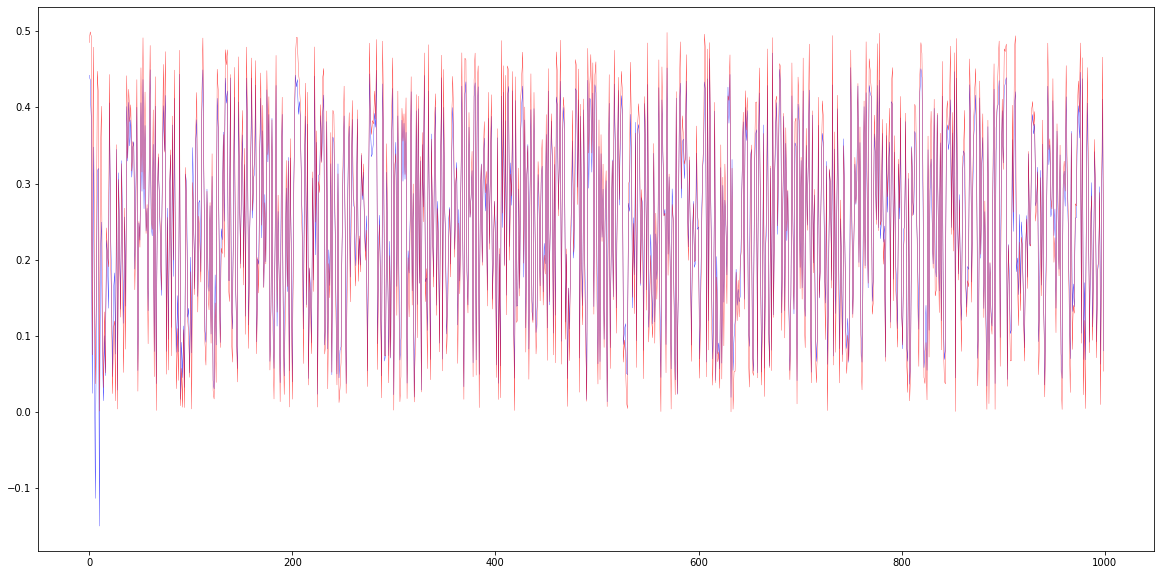

In [28]:
y = model.predict(X_train)
t=np.arange(start=0,stop=len(X_train[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.2)
plt.plot(t,Y_train.ravel(), color = 'r', linewidth= 0.2)
model.evaluate(X_train, Y_train)


y = model.predict(X_valid)
t=np.arange(start=0,stop=len(X_valid[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.3)
plt.plot(t,Y_valid.ravel(), color = 'r', linewidth= 0.3)
model.evaluate(X_valid, Y_valid)
